In [ ]:
from utils import download_cutout_from_zarr

cutout = download_cutout_from_zarr(
    ng_link="http://10.128.140.80/neuroglancer/#!https://json.neurodata.io/v1?NGStateID=jtA8unR1E-RnHg",
    layer_name="Pos1",
    center=(20762, 18605, 1361), # at mip0, copy directly from NG
    size=(500, 500, 500), # at mip0
    out_path='test', # can save as .npy
    mip="2" # Specify mip level
)

Opening TensorStore...
Global center=(20762, 18605, 1361), Offset=[    0 10640     0], Local center=[5190 1991  340]
Clipped start=[5128, 1929, 278], stop=[5252, 2053, 402], shape=[124, 124, 124]
Dataset shape: zyx = (12146, 3548, 665)
Saving cutout to test with shape (124, 124, 124)


In [37]:
# save a tiff image

import tifffile as tiff
tiff.imwrite('PO6_S3_Pos2_a2.tiff', cutout)

In [2]:
from skimage import exposure

img_rescale = exposure.equalize_adapthist(cutout, clip_limit=0.03)  # Apply CLAHE for better contrast

In [3]:
# visulization using microviewer
import microviewer
microviewer.view(img_rescale, seg=False)

Viewer server listening to http://localhost:8080



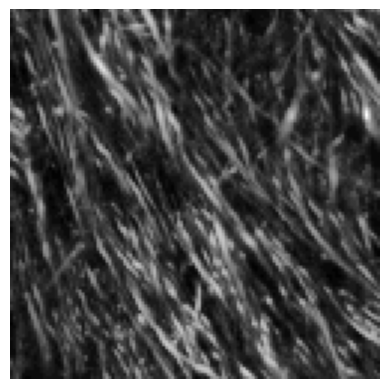

In [4]:
# visulize the midplane of the cutout

import numpy as np
import matplotlib.pyplot as plt
midplane = img_rescale[:, :, img_rescale.shape[2] // 2]  # Get the midplane along the z-axis
plt.imshow(midplane, cmap='gray')
plt.axis('off')
plt.show()
